In [1]:
# loading the nyu depth v2 dataset csv file
import pandas as pd
df = pd.read_csv("datasets/nyu_data/data/nyu2_train.csv")

In [2]:
df.shape

(50688, 2)

In [11]:
# randomly selecting 3000 rows from the dataset
df = df.sample(n=3000, random_state=42)
df.shape

(3000, 2)

In [16]:
# loading the nyu depth v2 dataset csv file test
df_test = pd.read_csv("datasets/nyu_data/data/nyu2_test.csv")

In [17]:
df_test.shape

(654, 2)

In [20]:
# adding the test dataset to the training dataset
df = pd.concat([df, df_test], axis=0)
df.shape

(3654, 2)

In [21]:
# copying the selected images to a new folder selected
import shutil
import os
for i in range(df.shape[0]):
    shutil.copy("datasets/nyu_data/"+df.iloc[i,0], "datasets/nyu_data/selected/colours")
    shutil.copy("datasets/nyu_data/"+df.iloc[i,1], "datasets/nyu_data/selected/depth")

In [22]:
df.head()

,0,1
21273,data/nyu2_train/bedroom_0138_out/21.jpg,data/nyu2_train/bedroom_0138_out/21.png
14278,data/nyu2_train/bedroom_0080_out/11.jpg,data/nyu2_train/bedroom_0080_out/11.png
14303,data/nyu2_train/bedroom_0080_out/43.jpg,data/nyu2_train/bedroom_0080_out/43.png
16156,data/nyu2_train/dining_room_0010_out/21.jpg,data/nyu2_train/dining_room_0010_out/21.png
12899,data/nyu2_train/bedroom_0106_out/32.jpg,data/nyu2_train/bedroom_0106_out/32.png


In [23]:
# creating a new csv file for the selected images by removing everything until the last /
df.iloc[:,0] = df.iloc[:,0].apply(lambda x: x.split("/")[-1])
df.iloc[:,1] = df.iloc[:,1].apply(lambda x: x.split("/")[-1])

In [24]:
df.head()

,0,1
21273,21.jpg,21.png
14278,11.jpg,11.png
14303,43.jpg,43.png
16156,21.jpg,21.png
12899,32.jpg,32.png


In [25]:
# saving the dataframe to a csv file
df.to_csv("datasets/nyu_data/selected/selected.csv", index=False)

In [29]:
# naming the rows images and depths
df.columns = ["colours", "depths"]

In [30]:
# saving the dataframe to a csv file
df.to_csv("datasets/nyu_data/selected/selected.csv", index=False)

In [31]:
df.head()

,colours,depths
21273,21.jpg,21.png
14278,11.jpg,11.png
14303,43.jpg,43.png
16156,21.jpg,21.png
12899,32.jpg,32.png


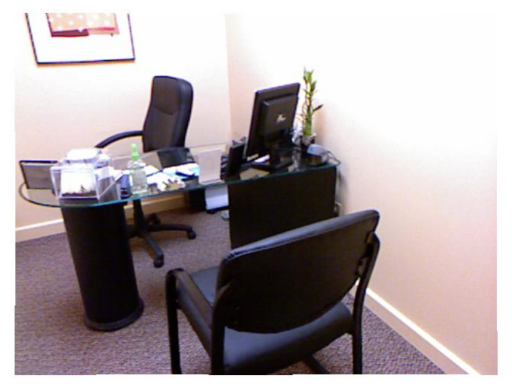

In [32]:
# displaying an image
import cv2
import matplotlib.pyplot as plt
image = cv2.imread("datasets/nyu_data/selected/colours/"+df.iloc[0,0])
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

In [54]:
# writing a function to add blur to the image given the image
def add_blur(image,kernel_size=(5,5)):
    return cv2.GaussianBlur(image, kernel_size, 0)

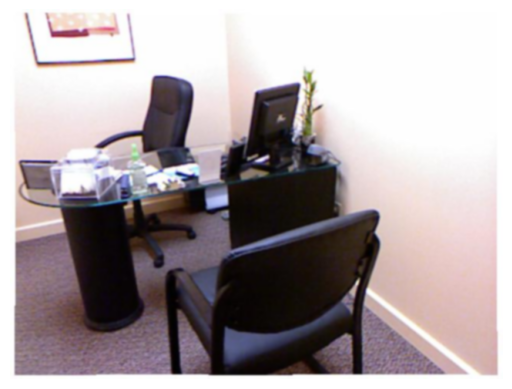

In [46]:
# blurring the image
blurred_image = add_blur(image)
plt.imshow(cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

In [52]:
# creating a new folder to save the blurred images
os.makedirs("datasets/nyu_data/selected/colours_blurred/5_5", exist_ok=True)
# creating a new folder to save 9x9 blurred images
os.makedirs("datasets/nyu_data/selected/colours_blurred/9_9", exist_ok=True)
# creating a new folder to save 11x11 blurred images
os.makedirs("datasets/nyu_data/selected/colours_blurred/13_13", exist_ok=True)
# creating a new folder to save 17x17 blurred images
os.makedirs("datasets/nyu_data/selected/colours_blurred/17_17", exist_ok=True)

In [55]:
# saving all the images in dataset with gaussian blur in a new folder and tracking progress using tqdm
from tqdm import tqdm
for i in tqdm(range(df.shape[0])):
    image = cv2.imread("datasets/nyu_data/selected/colours/"+df.iloc[i,0])
    blurred_image = add_blur(image)
    cv2.imwrite("datasets/nyu_data/selected/colours_blurred/5_5/"+df.iloc[i,0], blurred_image)
    blurred_image = add_blur(image, kernel_size=(9,9))
    cv2.imwrite("datasets/nyu_data/selected/colours_blurred/9_9/"+df.iloc[i,0], blurred_image)
    blurred_image = add_blur(image, kernel_size=(13,13))
    cv2.imwrite("datasets/nyu_data/selected/colours_blurred/13_13/"+df.iloc[i,0], blurred_image)
    blurred_image = add_blur(image, kernel_size=(17,17))
    cv2.imwrite("datasets/nyu_data/selected/colours_blurred/17_17/"+df.iloc[i,0], blurred_image)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3654/3654 [03:02<00:00, 20.07it/s]


In [56]:
# writing function to add salt and pepper noise to the image
def add_salt_pepper_noise(image, amount=0.004):
    row, col, _ = image.shape
    num_salt = np.ceil(amount * image.size * 0.5)
    num_pepper = np.ceil(amount * image.size * 0.5)
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
    image[coords[0], coords[1], :] = 1
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
    image[coords[0], coords[1], :] = 0
    return image

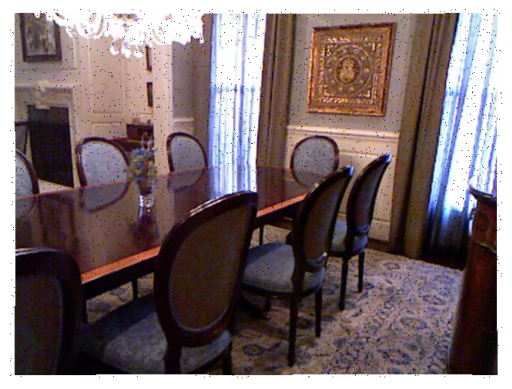

In [58]:
# adding salt and pepper noise to the image
import numpy as np
noisy_image = add_salt_pepper_noise(image)
plt.imshow(cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

In [59]:
# creating a new folder to save the noisy images
os.makedirs("datasets/nyu_data/selected/colours_noisy", exist_ok=True)
# creating a new folder to save the noisy images with 0.01 noise
os.makedirs("datasets/nyu_data/selected/colours_noisy/0_01", exist_ok=True)
# creating a new folder to save the noisy images with 0.02 noise
os.makedirs("datasets/nyu_data/selected/colours_noisy/0_02", exist_ok=True)
# creating a new folder to save the noisy images with 0.04 noise
os.makedirs("datasets/nyu_data/selected/colours_noisy/0_04", exist_ok=True)
# creating a new folder to save the noisy images with 0.08 noise
os.makedirs("datasets/nyu_data/selected/colours_noisy/0_08", exist_ok=True)

In [60]:
# saving all the images in dataset with salt and pepper noise in a new folder and tracking progress using tqdm
for i in tqdm(range(df.shape[0])):
    image = cv2.imread("datasets/nyu_data/selected/colours/"+df.iloc[i,0])
    noisy_image = add_salt_pepper_noise(image, amount=0.01)
    cv2.imwrite("datasets/nyu_data/selected/colours_noisy/0_01/"+df.iloc[i,0], noisy_image)
    noisy_image = add_salt_pepper_noise(image, amount=0.02)
    cv2.imwrite("datasets/nyu_data/selected/colours_noisy/0_02/"+df.iloc[i,0], noisy_image)
    noisy_image = add_salt_pepper_noise(image, amount=0.04)
    cv2.imwrite("datasets/nyu_data/selected/colours_noisy/0_04/"+df.iloc[i,0], noisy_image)
    noisy_image = add_salt_pepper_noise(image, amount=0.08)
    cv2.imwrite("datasets/nyu_data/selected/colours_noisy/0_08/"+df.iloc[i,0], noisy_image)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3654/3654 [03:10<00:00, 19.20it/s]


In [63]:
# writing function to add gaussian noise to the image using cv2.
def add_gaussian_noise(image, sigma=25):
    row, col, ch = image.shape
    mean = 0
    gauss = np.random.normal(mean, sigma, (row, col, ch))
    noisy = np.clip(image + gauss, 0, 255)
    return noisy

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


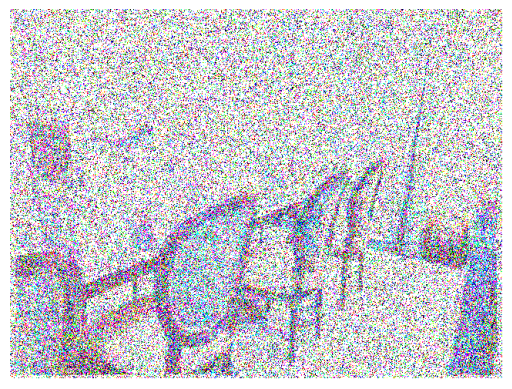

In [64]:
# adding gaussian noise to the image
noisy_image = add_gaussian_noise(image)
plt.imshow(noisy_image)
plt.axis("off")
plt.show()

In [67]:
# creating a new folder to save the noisy images
os.makedirs("datasets/nyu_data/selected/colours_noisy_gaussian", exist_ok=True)
# creating a new folder to save the noisy images with sigma 25
os.makedirs("datasets/nyu_data/selected/colours_noisy_gaussian/25", exist_ok=True)
# creating a new folder to save the noisy images with sigma 50
os.makedirs("datasets/nyu_data/selected/colours_noisy_gaussian/50", exist_ok=True)
# creating a new folder to save the noisy images with sigma 100
os.makedirs("datasets/nyu_data/selected/colours_noisy_gaussian/100", exist_ok=True)
# creating a new folder to save the noisy images with sigma 200
os.makedirs("datasets/nyu_data/selected/colours_noisy_gaussian/200", exist_ok=True)

In [ ]:
# saving all the images in dataset with gaussian noise in a new folder and tracking progress using tqdm
for i in tqdm(range(df.shape[0])):
    image = cv2.imread("datasets/nyu_data/selected/colours/"+df.iloc[i,0])
    noisy_image = add_gaussian_noise(image, sigma=25)
    cv2.imwrite("datasets/nyu_data/selected/colours_noisy_gaussian/25/"+df.iloc[i,0], noisy_image)
    noisy_image = add_gaussian_noise(image, sigma=50)
    cv2.imwrite("datasets/nyu_data/selected/colours_noisy_gaussian/50/"+df.iloc[i,0], noisy_image)
    noisy_image = add_gaussian_noise(image, sigma=100)
    cv2.imwrite("datasets/nyu_data/selected/colours_noisy_gaussian/100/"+df.iloc[i,0], noisy_image)
    noisy_image = add_gaussian_noise(image, sigma=200)
    cv2.imwrite("datasets/nyu_data/selected/colours_noisy_gaussian/200/"+df.iloc[i,0], noisy_image)

 55%|███████████████████████████████████████████████████████████████████████████                                                              | 2003/3654 [07:16<05:44,  4.79it/s]

In [69]:
print('hello')

hello


In [99]:
# displaying the dataset
df.head()

,colours,depths
21273,21.jpg,21.png
14278,11.jpg,11.png
14303,43.jpg,43.png
16156,21.jpg,21.png
12899,32.jpg,32.png


In [100]:
# putting the first column in a list
colours = df.iloc[:,0].tolist()
# putting the second column in a list
depths = df.iloc[:,1].tolist()

In [101]:
# creating a new empty dataframe with column names images and depths
new_df = pd.DataFrame(columns=["images", "depths"])

In [102]:
# appending colours/ to all the elements in the list and saving it to a new list
colours = ['colours/' + i for i in colours]
# appending depths/ to all the elements in the list and saving it to a new list
depths = ['depth/' + i for i in depths]

# adding other folders to the list
colours = colours + ['colours_noisy/0_01/' + i for i in df['colours']] + ['colours_noisy/0_02/' + i for i in df['colours']] + ['colours_noisy/0_04/' + i for i in df['colours']] + ['colours_noisy/0_08/' + i for i in df['colours']] + ['colours_noisy_gaussian/25/' + i for i in df['colours']] + ['colours_noisy_gaussian/50/' + i for i in df['colours']] + ['colours_noisy_gaussian/100/' + i for i in df['colours']] + ['colours_noisy_gaussian/200/' + i for i in df['colours']] + ['colours_blurred/5_5/' + i for i in df['colours']] + ['colours_blurred/9_9/' + i for i in df['colours']] + ['colours_blurred/13_13/' + i for i in df['colours']] + ['colours_blurred/17_17/' + i for i in df['colours']]

depths = depths * 13

# adding the colours and depths list to the new dataframe
new_df["images"] = colours
new_df["depths"] = depths

In [103]:
new_df.head()

,images,depths
0,colours/21.jpg,depth/21.png
1,colours/11.jpg,depth/11.png
2,colours/43.jpg,depth/43.png
3,colours/21.jpg,depth/21.png
4,colours/32.jpg,depth/32.png


In [104]:
new_df.shape

(47502, 2)

In [105]:
# displaying a random row from the dataframe
new_df.iloc[25000,:]

images    colours_noisy_gaussian/50/00184_colors.png
depths                         depth/00184_depth.png
Name: 25000, dtype: object

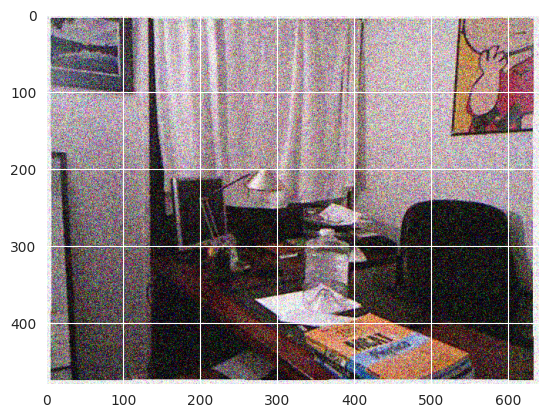

In [113]:
# displaying the image
image = cv2.imread("datasets/nyu_data/selected/"+new_df.iloc[25000,0])
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [129]:
# saving new_df to a csv file
new_df.to_csv("datasets/nyu_data/selected/selected_augmented.csv", index=False)